# Combinatorial library vs. KLIFS

## Aim of this notebook

In this notebook we want to compare the combinatorial library to the original KLIFS ligands, i.e. the ligands from which the fragment library originates from.

## Table of contents

1. Combinatorial library data
2. Exact matches
3. Substructure matches

In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import ijson
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw, PandasTools

from utils import read_fragment_library, construct_ligand

In [3]:
PATH_COMBINATORIAL_LIBRARY = Path('../data/combinatorial_library/combinatorial_library.json')

## 1. Load combinatorial library data

The combinatorial library comes as large JSON file. In order to access/filter ligands efficiently (time and memory), we use the `ijson` library:

> Ijson is an iterative JSON parser with standard Python iterator interfaces.

https://pypi.org/project/ijson/

For a detailed description on the kind of information linked to the combinatorial library, please take a look at the notebook `notebooks/4_1_combinatorial_library_properties.ipynb`.

## 2. Load original ligands

In [4]:
original_ligands = pd.read_json('../data/fragment_library/original_ligands.json')
PandasTools.AddMoleculeColumnToFrame(original_ligands, 'smiles')
original_ligands.reset_index(inplace=True)
print(f'Number of original ligands: {original_ligands.shape[0]}')

Number of original ligands: 2553


,index,complex_pdb,ligand_pdb,subpocket,kinase,family,group,alt,chain,ac_helix,smiles,inchi,ROMol
0,0,1a9u,SB2,"[AP, GA, B2]",p38a,MAPK,CMGC,,A,out-like,C[S@](=O)c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc3)...,InChI=1S/C21H16FN3OS/c1-27(26)18-8-4-16(5-9-18...,
1,1,1agw,SU2,"[AP, SE]",FGFR1,FGFR,TK,B,B,out-like,O=CN1CCN(c2ccc(C[C@@H]3C(=O)Nc4ccccc43)cc2)CC1,InChI=1S/C20H21N3O2/c24-14-22-9-11-23(12-10-22...,

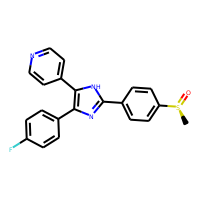
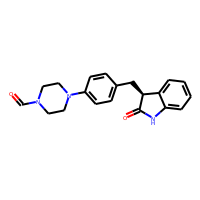

In [5]:
original_ligands.head(2)

## 3. Load reduced fragment library

In [6]:
fragment_library = read_fragment_library(Path('../data/fragment_library_reduced/'))
fragment_library.keys()

dict_keys(['AP', 'FP', 'SE', 'GA', 'B1', 'B2'])

## 2. Analyze exact matches

Get recombined ligands in combinatorial library that have exact matches in the KLIFS original ligands.

### Load exact matches

In [7]:
exact_matches = pd.read_json('../data/combinatorial_library/original_exact.json')

In [8]:
exact_matches['ROMol'] = exact_matches.inchi.apply(Chem.MolFromInchi)

In [9]:
print(f'Number of exact matches in KLIFS original ligands: {exact_matches.shape[0]}')

Number of exact matches in KLIFS original ligands: 35


### Merge combinatorial library data (fragment/bond IDs) with original ligands data (structure metadata)

In [10]:
exact_matches.columns

Index(['bond_ids', 'fragment_ids', 'hba', 'hbd', 'mwt', 'logp', 'n_atoms',
       'chembl_exact', 'original_exact', 'original_substructure', 'inchi',
       'ROMol'],
      dtype='object')

In [11]:
original_ligands.columns

Index(['index', 'complex_pdb', 'ligand_pdb', 'subpocket', 'kinase', 'family',
       'group', 'alt', 'chain', 'ac_helix', 'smiles', 'inchi', 'ROMol'],
      dtype='object')

,bond_ids,fragment_ids,ROMol_x,complex_pdb,ligand_pdb,subpocket,kinase,family,group,alt,chain,ac_helix,ROMol_y
0,"[[SE_10, AP_9], [FP_10, AP_8]]","[FP_14, SE_22, AP_95]",,4hgl,0YO,"[AP, FP, SE]",CK1g3,CK1,CK1,,A,in,
1,"[[B1_7, GA_10], [AP_12, GA_9]]","[GA_35, AP_134, B1_19]",,3bbt,FMM,"[AP, GA, B1]",ErbB4,EGFR,TK,,D,out,
2,"[[GA_10, AP_10]]","[GA_37, AP_117]",,5xyx,FTZ,"[AP, GA]",p38a,MAPK,CMGC,B,A,in,
3,"[[FP_8, AP_7], [AP_8, SE_13]]","[FP_180, AP_24, SE_1]",,5opr,A3E,"[AP, FP, SE]",CHK1,CAMKL,CAMK,,A,in,
4,"[[GA_6, AP_9], [SE_9, AP_10]]","[SE_82, GA_83, AP_69]",,4y8d,49J,"[AP, SE, GA]",GAK,NAK,Other,B,B,in,
5,"[[AP_8, SE_6]]","[AP_15, SE_30]",,6g91,EQW,"[AP, SE]",Erk2,MAPK,CMGC,B,A,in,
6,"[[AP_15, FP_7]]","[FP_40, AP_37]",,4alu,79O,"[AP, FP]",PIM1,PIM,CAMK,B,A,in,
7,"[[FP_15, AP_10]]","[AP_86, FP_31]",,4mk0,29X,"[AP, FP]",BARK1,GRK,AGC,B,A,in,
8,"[[FP_15, AP_9]]","[FP_31, AP_29]",,3v5w,8PR,"[AP, FP]",BARK1,GRK,AGC,A,A,in,
9,"[[GA_5, AP_10], [SE_7, AP_9]]","[GA_26, SE_61, AP_38]",,3nrm,NRM,"[AP, SE, GA]",AurA,Aur,Other,,A,in,

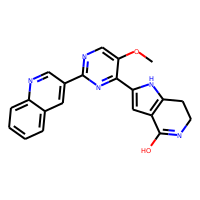
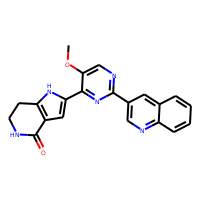
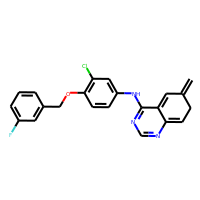
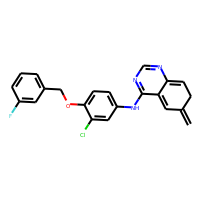
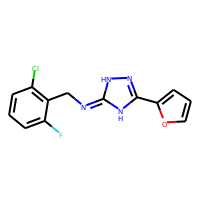
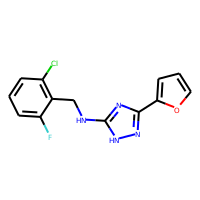
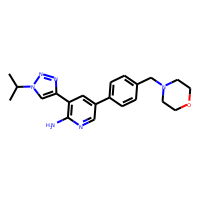
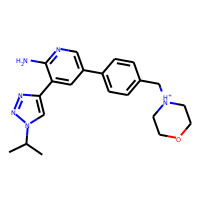
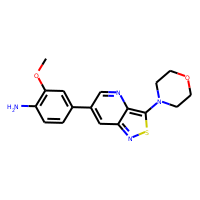
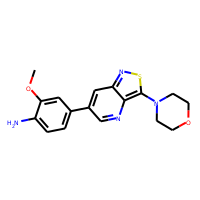
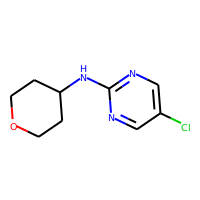
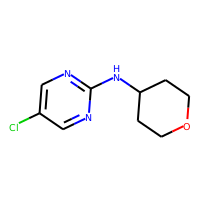
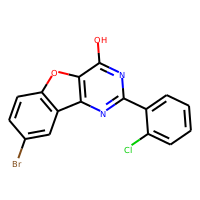
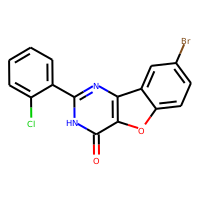
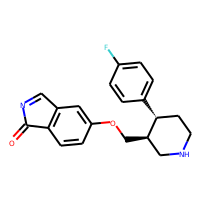
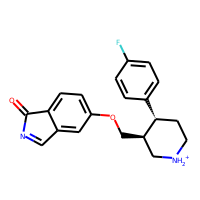
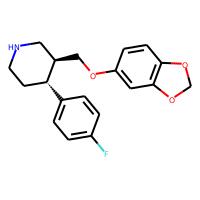
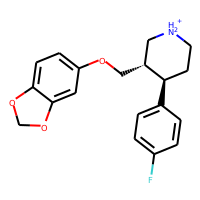
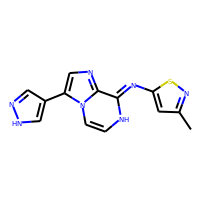
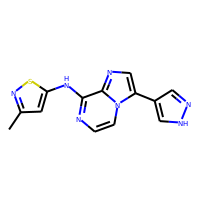
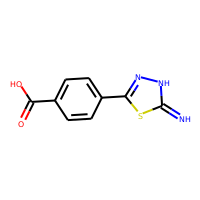
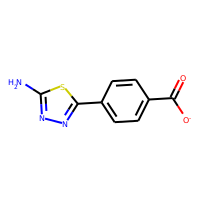
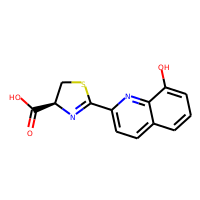
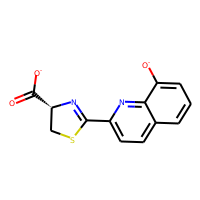
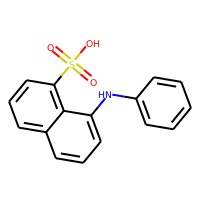
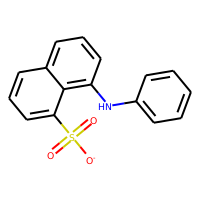
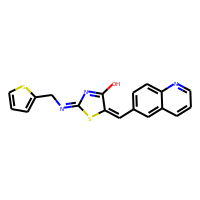
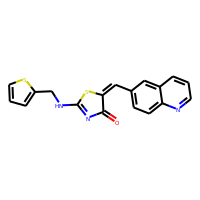
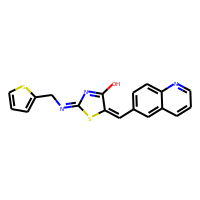
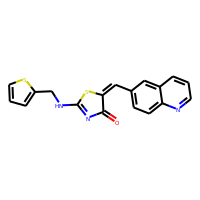
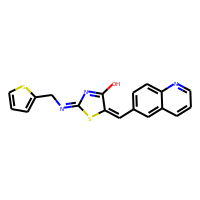
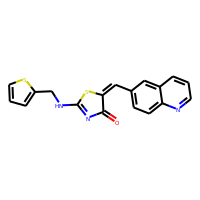
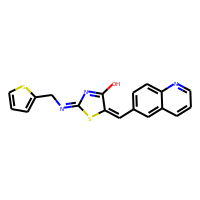
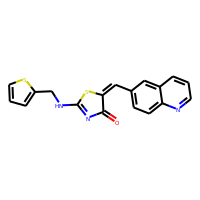
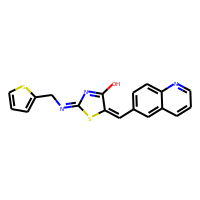
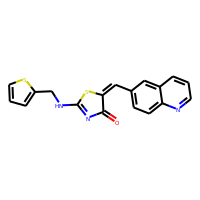
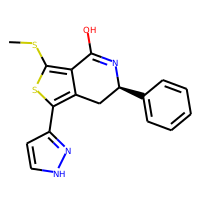
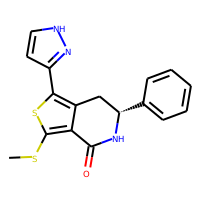
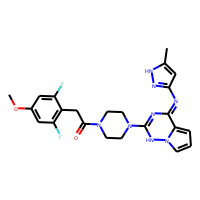
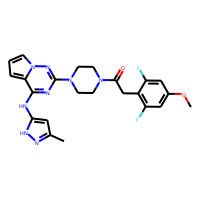
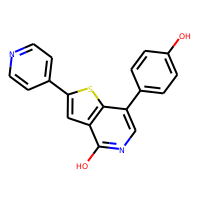
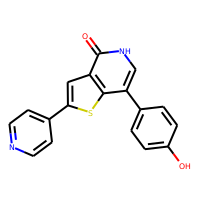
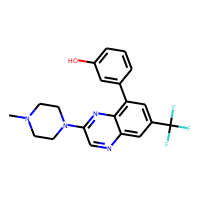
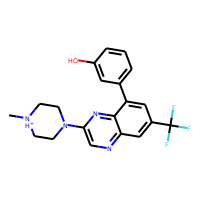
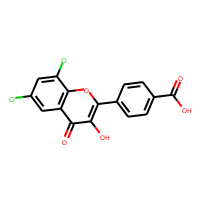
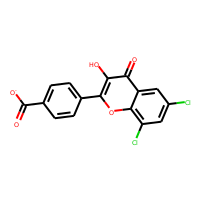
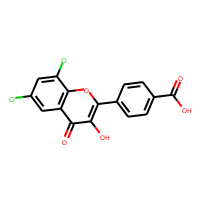
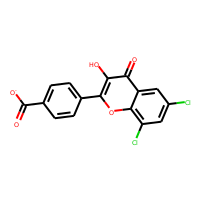
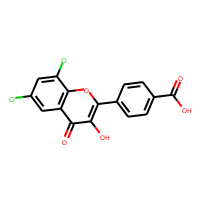
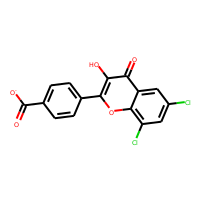
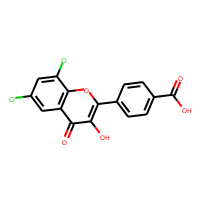
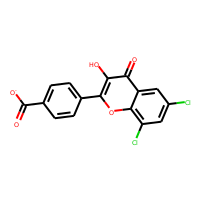
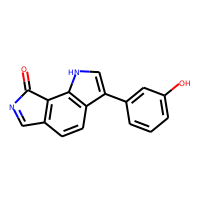
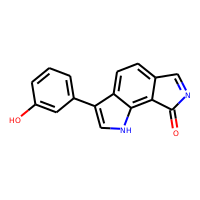
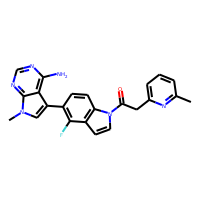
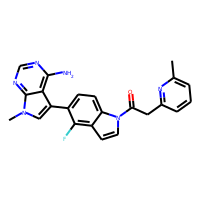
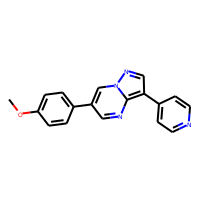
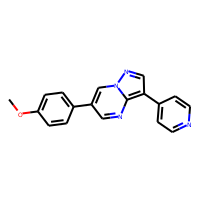
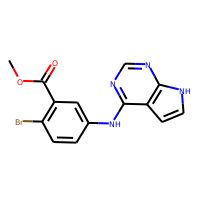
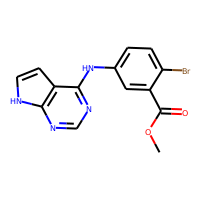
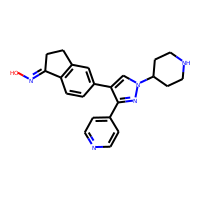
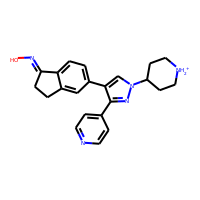
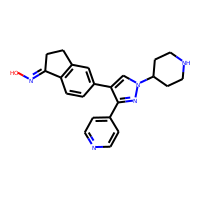
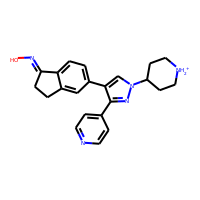
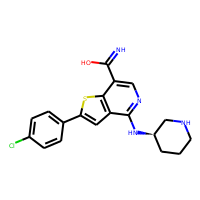
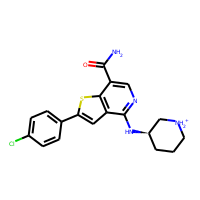
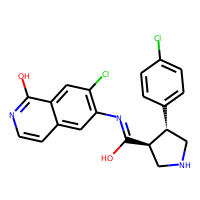
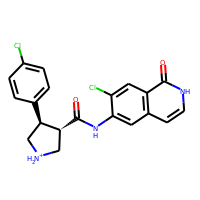
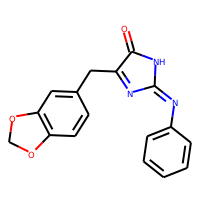
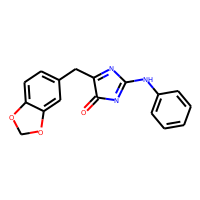
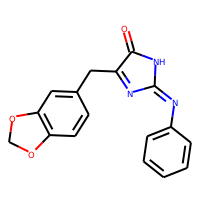
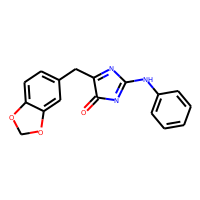
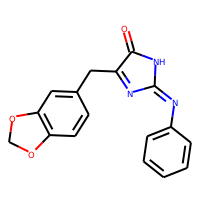
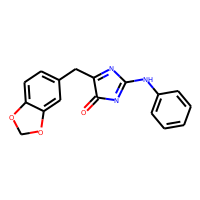
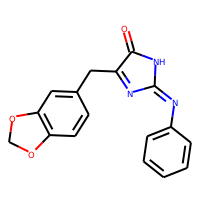
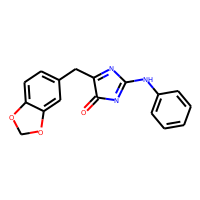
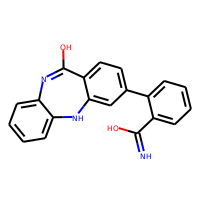
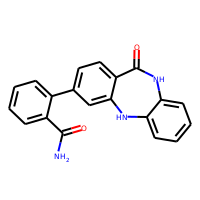
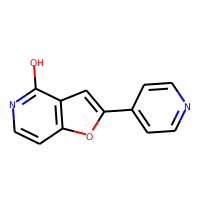
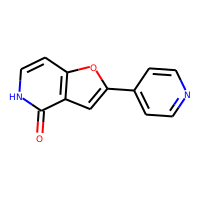
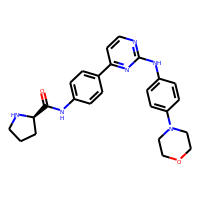
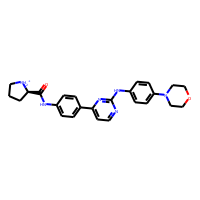
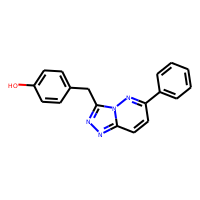
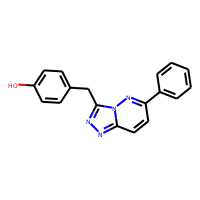
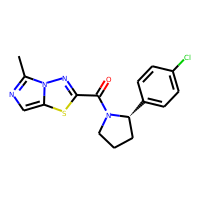
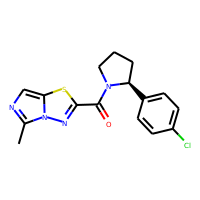
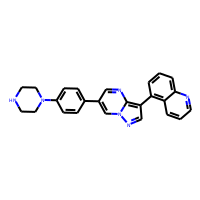
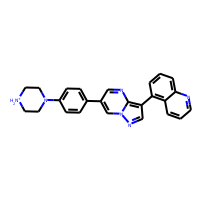
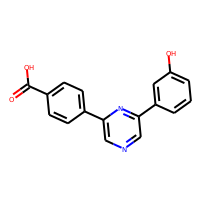
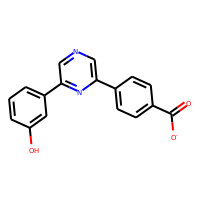
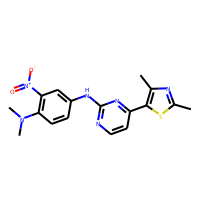
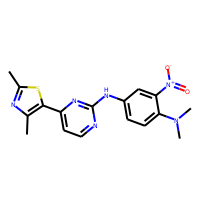

In [12]:
pd.merge(
    exact_matches.drop(['hba', 'hbd', 'mwt', 'logp', 'n_atoms', 'chembl_exact', 'original_exact', 'original_substructure'], axis=1), 
    original_ligands.drop(['index', 'smiles'], axis=1), 
    on='inchi', 
    how='left'
).drop('inchi', axis=1)

### Construct recombined ligands (from fragment/bond IDs)

In [13]:
recombined_ligands = []

for index, row in exact_matches.iterrows():
    
    recombined_ligand = construct_ligand(row.fragment_ids, row.bond_ids, fragment_library)
    recombined_ligands.append(recombined_ligand)

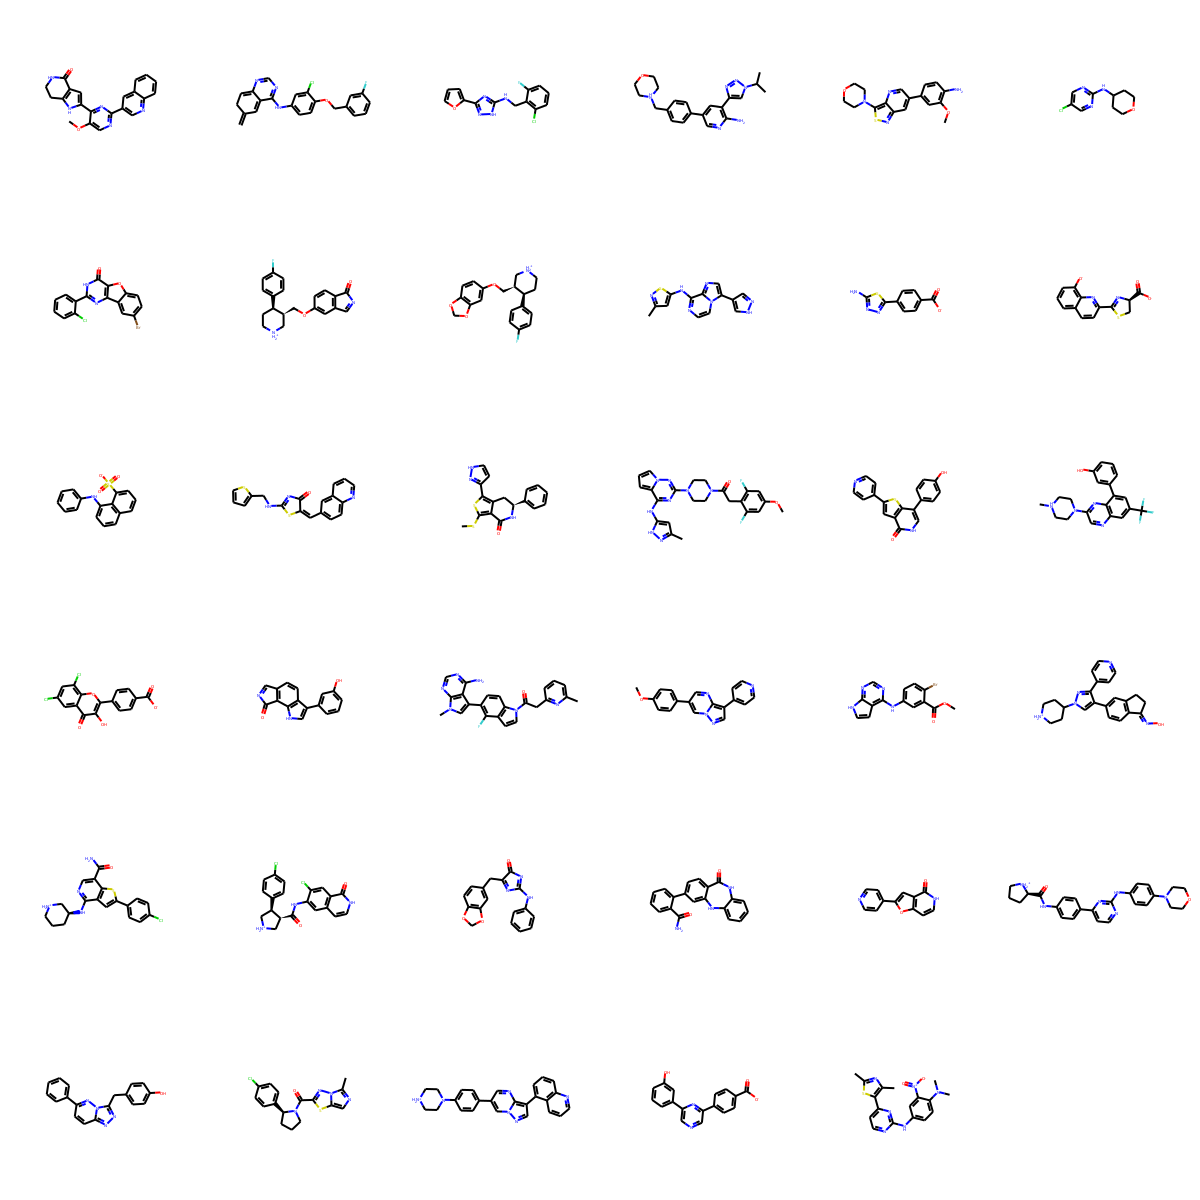

In [14]:
Draw.MolsToGridImage(recombined_ligands, molsPerRow=6)

## 3. Analyze substructure matches

Get recombined ligands in combinatorial library that have substructure matches in the KLIFS original ligands.

In [15]:
substructure_matches = pd.read_json('../data/combinatorial_library/original_substructure.json')

In [16]:
print(substructure_matches.shape[0])
substructure_matches.head(2)

325


,bond_ids,fragment_ids,hba,hbd,mwt,logp,n_atoms,chembl_exact,original_exact,original_substructure,inchi
0,"[[GA_4, FP_7], [SE_10, AP_8], [FP_6, AP_7]]","[SE_18, AP_14, GA_40, FP_3]",1,1,1,1,26,0,0,1,InChI=1S/C18H23N5O3/c1-25-14-6-5-13(10-15(14)2...
1,"[[FP_8, AP_7], [SE_7, AP_8], [GA_6, FP_7]]","[GA_45, SE_27, FP_128, AP_14]",1,1,1,1,27,0,0,1,InChI=1S/C21H23N5O/c22-15-8-10-16(11-9-15)25-2...
